#### 차량 판매 실적 시각화

In [412]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import matplotlib.pyplot as plt

In [355]:
# kia_folder = './kia/'
kia_22 = '2022년 차종별 판매실적.xlsx'
kia_23 = '2023년 차종별판매실적.xlsx'
kia_24 = '2024년 차종별판매실적.xlsx'
hd_22 = '2022-sales-by-model.xlsx'
hd_23 = 'hmc-sales-by-model-december-y2023.xlsx'
hd_24 = 'hmc-sales-by-model-december-y2024.xlsx'

In [356]:
def kia_excel(filename:str):
    kia_folder = 'kia/' + filename
    df = pd.read_excel(kia_folder, engine='openpyxl', header=2)
    # header 순서 명시
    # print(df)
    # 데이터가 있는 행, 열만 선택
    start_row = 1
    # end_row = 26
    start_col = 3
    end_col = 17
    df_selected = df.iloc[start_row:, start_col:end_col+1]


    # print(df_selected)
    # row_to_drop = 3
    col_to_drop = [1, 2]
    df_selected = df_selected.drop(columns=df_selected.columns[col_to_drop])
    # 차종 명 컬럼 Undefined -> Model
    cols = list(df_selected.columns)
    cols[0] = 'Model'
    df_selected.columns = cols
    df_selected['Model'] = df_selected['Model'].str.strip()
    # print(df_selected)
    
    # print(df_selected['Model'] == 'Bus')
    #특수목적 차량 (버스, 군용 등) 제외
    bus_indices = df_selected[df_selected['Model'] == 'Bus'].index.tolist()
    first_bus_index = min(bus_indices)
    # print(bus_index)

    df_bus_before = df_selected.iloc[:first_bus_index-1]
    
    # Nan 처리
    df_filled = df_bus_before.fillna(0)
    # 'Model' 컬럼은 제외하고 나머지 컬럼만 int 형으로 변환
    cols_to_convert = df_filled.columns.difference(['Model']) # 'Model' 제외한 컬럼 선택
    
    df_int = df_filled[cols_to_convert].astype(int)

    # 'Model' 컬럼은 원래대로 유지하고, int 형으로 변환된 컬럼들과 병합
    df_result = pd.concat([df_filled['Model'], df_int], axis=1)
    Model_col = df_result['Model']
    
    # 컬럼 월별 재정렬
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    month_cols = df_result[month_order]
    reordered_month_cols = month_cols[month_order]
    df_result = pd.concat([Model_col, reordered_month_cols], axis=1)
    
    return df_result

In [357]:
kia22_df = kia_excel(kia_22)
kia23_df = kia_excel(kia_23)
kia24_df = kia_excel(kia_24)

In [358]:
kia24_df

,Model,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,Morning,1214,1140,1416,1421,907,985,1335,910,968,1464,1467,2608
2,Ray,4130,3972,4692,4460,4456,3574,4384,3710,3363,3278,4753,4219
3,K3,1419,1315,1460,1336,995,1341,1373,588,4,0,0,0
4,K5,3336,2970,3577,3168,2405,2932,2702,2690,2277,3030,2645,2105
5,EV4,0,0,0,0,0,0,0,0,0,0,0,0
6,K7 / K8,2917,2165,2016,1988,1873,1519,1154,2711,4724,4977,4336,2354
7,K9,175,191,140,253,282,160,202,177,163,127,99,240
8,Seltos,3944,3967,4748,5025,6120,5399,5489,5551,4433,6822,4887,5512
9,EV3,0,0,0,0,0,0,1975,4002,2022,2107,2284,461
10,Niro,1239,940,1051,1815,1709,1333,1199,1109,870,958,1162,1185


In [359]:
kia23_df

,Model,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,Morning,1813,2049,2127,2164,2502,2245,2033,2910,1892,2225,2111,1808
2,Ray,3585,4268,4155,4158,4576,4372,4285,4402,3464,4824,4587,4254
3,K3,950,1024,1197,670,975,1540,976,1123,1036,939,1428,1346
4,K5,2560,2653,3421,2739,3166,2963,2246,2613,2280,2592,3783,3563
5,Stinger,113,120,143,61,45,1,0,0,0,0,0,0
6,K7 / K8,3451,4168,4569,4011,4487,4469,3513,2457,2406,2248,2799,1859
7,K9,431,301,432,422,310,366,372,347,232,226,236,223
8,Seltos,3366,5552,3891,4119,4792,5224,4770,3512,4399,3008,4446,3758
9,Niro,1269,1588,2219,2120,1990,1992,1614,1694,1681,1595,1541,1256
10,Niro Plus,0,292,460,475,462,298,303,115,103,218,120,70


In [360]:
kia22_df

,Model,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,Morning,1534,1700,3559,2790,2258,2414,3278,2153,1940,2246,3356,2152
2,Ray,3598,3218,3566,3993,3788,3812,4125,2836,3860,3363,4098,4309
3,Pride,0,0,0,0,0,0,0,0,0,0,0,0
4,K3,1792,1573,2020,2351,1726,1610,2468,800,838,1500,2114,2229
5,K5,3342,2562,2642,2624,2618,2352,2859,2155,2055,2514,3208,2567
6,Stinger,166,164,218,235,206,184,112,157,57,184,193,108
7,K7 / K8,2566,2932,2722,4176,3636,4012,4807,4257,3990,3613,3867,5072
8,K9,487,537,1001,664,419,453,567,602,260,371,620,604
9,Stonic,0,0,0,0,0,0,0,0,0,0,0,0
10,Seltos,3468,3538,4266,3364,2863,3261,4120,3610,3513,3150,3449,4493


In [361]:
def hyundai_excel(filename:str):
    hyundai_folder = 'hyundai/' + filename
    df = pd.read_excel(hyundai_folder, engine='openpyxl', header=0)
    df = df.drop(columns=df.columns[-1])
    df.columns = [c.replace('.', '')for c in df.columns]
    return df

In [362]:
hd22_df = hyundai_excel(hd_22)
hd23_df = hyundai_excel(hd_23)
hd24_df = hyundai_excel(hd_24)

In [363]:
hd22_df.head(50)

,Model,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Avante (CN7),4366,2846,2956,5143,3911,2578,3927,1911,3967,5008,5041,7137
1,Avante (CN7 HEV),733,519,534,687,636,565,562,371,356,492,560,960
2,Avante (CN7 N),338,332,402,552,371,167,208,124,131,115,99,138
3,IONIQ (AE HEV),0,0,0,0,0,0,0,0,0,0,0,0
4,IONIQ (AE PHEV),0,0,0,0,0,0,0,0,0,0,0,0
5,IONIQ (AE EV),0,0,0,0,0,0,0,0,0,0,0,0
6,Veloster (JS N),21,26,30,22,34,29,17,4,0,0,0,0
7,Sonata (LF),141,1199,1054,1509,1677,827,1511,1513,1963,1829,1693,1463
8,Sonata (DN8),1748,2486,2629,2242,2196,3261,2616,2463,2411,1280,1672,2502
9,Sonata (DN8 HEV),147,491,634,414,117,629,285,356,211,214,374,551


In [364]:
hd23_df

,Model,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Avante (CN7),5241,5430,5466,5123,5191,4556,3534,4193,3739,4246,4760,4196
1,Avante (CN7 HEV),777,827,1070,120,1365,742,466,402,407,640,953,794
2,Avante (CN7 N),82,79,83,35,43,20,2,163,221,131,115,152
3,IONIQ (AE HEV),0,0,0,0,0,0,0,0,0,0,0,0
4,IONIQ (AE PHEV),0,0,0,0,0,0,0,0,0,0,0,0
5,IONIQ (AE EV),0,0,0,0,0,0,0,0,0,0,0,0
6,Veloster (JS N),0,0,0,0,0,0,0,0,0,0,0,0
7,Sonata (LF),996,1012,1230,1603,901,1162,673,401,407,303,321,310
8,Sonata (DN8),1189,842,608,422,1432,2258,1588,1856,1869,3537,3498,3612
9,Sonata (DN8 HEV),354,386,377,207,297,693,554,744,671,1009,1076,1243


In [365]:
hd24_df

,Model,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Avante (CN7),3994,1828,3651,5131,5226,4196,3458,3450,3290,5411,4787,5766
1,Avante (CN7 HEV),398,402,462,567,432,468,415,435,396,517,496,617
2,Avante (CN7 N),46,62,75,108,135,142,102,54,61,64,169,79
3,IONIQ (AE HEV),0,0,0,0,0,0,0,0,0,0,0,0
4,IONIQ (AE PHEV),0,0,0,0,0,0,0,0,0,0,0,0
5,IONIQ (AE EV),0,0,0,0,0,0,0,0,0,0,0,0
6,Veloster (JS N),0,0,0,0,0,0,0,0,0,0,0,0
7,Sonata (LF),0,26,4,0,0,0,0,0,0,0,0,0
8,Sonata (DN8),379,1187,3298,3307,3207,2234,2412,2239,2296,2199,3133,3487
9,Sonata (DN8 HEV),117,210,776,786,778,814,695,956,1043,1194,1186,1348


In [366]:
def is_new_car(df:pd.DataFrame):
    df_values = df.iloc[:, 1:]
    # 첫 번째 열이 0으로 시작하는 조건
    start_with_zero = df_values.iloc[:, 0] == 0
    # start_with_zero = df.iloc[1:, 1] == 0

    # 모든 값이 0이 아닌 조건
    not_all_zero = (df_values != 0).any(axis=1)
    # not_all_zero = (df != 0).any(axis=1)

    # 두 조건을 모두 만족하는 행 추출
    
    df_result = df[start_with_zero & not_all_zero]    
    newcar = list(df_result['Model'])
    return df_result, newcar

In [367]:
new_hd24_df, new_model_hd24 = is_new_car(hd24_df)
new_hd24_df

,Model,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
7,Sonata (LF),0,26,4,0,0,0,0,0,0,0,0,0
22,Casper (AX EV),0,0,0,0,0,0,0,1439,2075,2186,1731,440


In [368]:
new_hd23_df, new_model_hd23 = is_new_car(hd23_df)
new_hd23_df

,Model,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
28,Kona (SX2 HEV),0,0,989,1653,974,941,836,1153,1056,1271,1454,682
29,Kona (SX2 EV),0,0,0,0,64,664,238,355,208,337,432,212
35,IONIQ 5 N (NE N),0,0,0,0,0,0,0,0,93,95,54,28
38,Santa-Fe (MX5),0,0,0,0,0,0,0,550,4329,3277,1708,2011
39,Santa-Fe (MX5 HEV),0,0,0,0,0,0,0,0,0,4669,6949,5616


In [369]:
new_hd22_df, new_model_hd22 = is_new_car(hd22_df)
new_hd22_df

,Model,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
12,Grandeur (GN7),0,0,0,0,0,0,0,0,0,0,1023,7486
13,Grandeur (GN7 HEV),0,0,0,0,0,0,0,0,0,0,0,1154
14,IONIQ 6 (CE),0,0,0,0,0,0,0,8,2652,3667,3905,1057
16,G70 S/B (IK S/B),0,0,0,0,0,51,200,115,126,124,106,81
36,GV70 (JK EV),0,0,94,414,544,485,337,331,240,173,234,100


In [370]:
new_kia24_df, new_model_kia24 = is_new_car(kia24_df)
new_kia24_df

,Model,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
9,EV3,0,0,0,0,0,0,1975,4002,2022,2107,2284,461


In [371]:
new_kia23_df, new_model_kia23 = is_new_car(kia23_df)
new_kia23_df

,Model,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
10,Niro Plus,0,292,460,475,462,298,303,115,103,218,120,70
11,EV6,0,1951,3009,2694,1894,1379,1398,948,601,1564,1096,693
15,EV9,0,0,0,0,0,1334,1251,408,1163,833,375,2688


In [372]:
new_kia22_df, new_model_kia22 = is_new_car(kia22_df)
new_kia22_df

,Model,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
13,Niro Plus,0,0,0,0,203,939,923,832,935,544,260,77


In [373]:
models_kia = set(kia22_df['Model']) | set(kia23_df['Model']) | set(kia24_df['Model'])
models_kia

{'Bongo',
 'BongoⅢ (Truck)',
 'Carnival',
 'EV3',
 'EV4',
 'EV6',
 'EV9',
 'K3',
 'K5',
 'K7 / K8',
 'K9',
 'Mohave',
 'Morning',
 'New Carens',
 'Niro',
 'Niro Plus',
 'Pride',
 'Ray',
 'Seltos',
 'Sorento',
 'Soul',
 'Sportage',
 'Stinger',
 'Stonic'}

In [374]:
models_hd = set(hd22_df['Model']) | set(hd23_df['Model']) | set(hd24_df['Model'])
models_hd

{'Avante (CN7 HEV)',
 'Avante (CN7 N)',
 'Avante (CN7)',
 'Casper (AX EV)',
 'Casper (AX)',
 'G70 (IK)',
 'G70 S/B (IK S/B)',
 'G80 (RG3 EV)',
 'G80 (RG3)',
 'G90',
 'G90 (HI)',
 'G90 (RS4)',
 'GV60 (JW)',
 'GV70 (JK EV)',
 'GV70 (JK)',
 'GV80 (JX)',
 'GV80 Coupe (JX Coupe)',
 'Grandeur (GN7 HEV)',
 'Grandeur (GN7)',
 'Grandeur (IG HEV)',
 'Grandeur (IG)',
 'IONIQ (AE EV)',
 'IONIQ (AE HEV)',
 'IONIQ (AE PHEV)',
 'IONIQ 5 (NE)',
 'IONIQ 5 N (NE N)',
 'IONIQ 6 (CE)',
 'Kona (OS EV)',
 'Kona (OS HEV)',
 'Kona (OS N)',
 'Kona (OS)',
 'Kona (SX2 EV)',
 'Kona (SX2 HEV)',
 'Kona (SX2)',
 'NEXO (FE)',
 'Palisade (LX2)',
 'Santa-Fe (MX5 HEV)',
 'Santa-Fe (MX5)',
 'Santa-Fe (TM HEV)',
 'Santa-Fe (TM)',
 'Sonata (DN8 HEV)',
 'Sonata (DN8)',
 'Sonata (LF)',
 'Tucson (NX4 HEV)',
 'Tucson (NX4)',
 'Tucson (TL)',
 'Veloster (JS N)',
 'Venue (QX)'}

In [404]:
set(['Sonata (LF)'])

{'Sonata (LF)'}

In [406]:
new_model_total = set(new_model_hd22) | set(new_model_hd23) | set(new_model_hd24) | set(new_model_kia22) | set(new_model_kia23) | set(new_model_kia24)
new_model_total -= set(['Sonata (LF)'])
new_model_total

{'Casper (AX EV)',
 'EV3',
 'EV6',
 'EV9',
 'G70 S/B (IK S/B)',
 'GV70 (JK EV)',
 'Grandeur (GN7 HEV)',
 'Grandeur (GN7)',
 'IONIQ 5 N (NE N)',
 'IONIQ 6 (CE)',
 'Kona (SX2 EV)',
 'Kona (SX2 HEV)',
 'Niro Plus',
 'Santa-Fe (MX5 HEV)',
 'Santa-Fe (MX5)'}

In [407]:
def make_new_car_selling_df(models:set, df_22, df_23, df_24):
    # cols = ['Model']
    # month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    data_df = pd.DataFrame(columns=['Model', '22_Jan', '22_Feb', '22_Mar', '22_Apr', '22_May', '22_Jun', '22_Jul', '22_Aug', '22_Sep', '22_Oct', '22_Nov', '22_Dec', '23_Jan', '23_Feb', '23_Mar', '23_Apr', '23_May', '23_Jun', '23_Jul', '23_Aug', '23_Sep', '23_Oct', '23_Nov', '23_Dec', '24_Jan', '24_Feb', '24_Mar', '24_Apr', '24_May', '24_Jun', '24_Jul', '24_Aug', '24_Sep', '24_Oct', '24_Nov', '24_Dec'])

    # 차량 모델 목록 순회
    for model in models:
        found_year = None
        sales_data = None

        # 연도별 데이터프레임 순회
        for year in [22, 23, 24]:
            target_df = None
            if year == 22:
                target_df = df_22
            elif year == 23:
                target_df = df_23
            elif year == 24:
                target_df = df_24

            if target_df is not None:
                mask = target_df['Model'] == model
                if mask.any():
                    found_year = year
                    sales_data = target_df.loc[mask, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].values.tolist()[0]
                    break

        # data_df에 데이터 추가
        if found_year is not None:
            new_row = {'Model': model}
            for y in [22, 23, 24]:
                if y < found_year:
                    for month in ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']:
                        new_row[f'{y}_{month}'] = 0
                elif y == found_year:
                    for i, month in enumerate(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']):
                        new_row[f'{y}_{month}'] = sales_data[i]
                else:
                    for month in ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']:
                        new_row[f'{y}_{month}'] = 0
            data_df = pd.concat([data_df, pd.DataFrame(new_row, index=[0])], ignore_index=True)

    return data_df

In [408]:
kia_new_sellling_df = make_new_car_selling_df(new_model_total, kia22_df, kia23_df, kia24_df)
kia_new_sellling_df

,Model,22_Jan,22_Feb,22_Mar,22_Apr,22_May,22_Jun,22_Jul,22_Aug,22_Sep,...,24_Mar,24_Apr,24_May,24_Jun,24_Jul,24_Aug,24_Sep,24_Oct,24_Nov,24_Dec
0,EV9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EV3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1975,4002,2022,2107,2284,461
2,Niro Plus,0,0,0,0,203,939,923,832,935,...,0,0,0,0,0,0,0,0,0,0
3,EV6,115,1706,2689,2976,2864,1808,3049,1672,2281,...,0,0,0,0,0,0,0,0,0,0


In [409]:
hd_new_sellling_df = make_new_car_selling_df(new_model_total, hd22_df, hd23_df, hd24_df)
hd_new_sellling_df

,Model,22_Jan,22_Feb,22_Mar,22_Apr,22_May,22_Jun,22_Jul,22_Aug,22_Sep,...,24_Mar,24_Apr,24_May,24_Jun,24_Jul,24_Aug,24_Sep,24_Oct,24_Nov,24_Dec
0,Kona (SX2 HEV),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Grandeur (GN7),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Santa-Fe (MX5),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,G70 S/B (IK S/B),0,0,0,0,0,51,200,115,126,...,0,0,0,0,0,0,0,0,0,0
4,Casper (AX EV),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1439,2075,2186,1731,440
5,Grandeur (GN7 HEV),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Kona (SX2 EV),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,IONIQ 6 (CE),0,0,0,0,0,0,0,8,2652,...,0,0,0,0,0,0,0,0,0,0
8,GV70 (JK EV),0,0,94,414,544,485,337,331,240,...,0,0,0,0,0,0,0,0,0,0
9,Santa-Fe (MX5 HEV),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [410]:
def merge_and_clean_dataframes(df1: pd.DataFrame, df2: pd.DataFrame) -> pd.DataFrame:
    """
    두 개의 데이터프레임을 수직으로 병합하고, 
    'Model' 컬럼을 제외한 다른 모든 컬럼의 값이 0인 행을 제거합니다.

    Args:
        df1: 첫 번째 데이터프레임
        df2: 두 번째 데이터프레임

    Returns:
        병합 및 정제된 데이터프레임
    """

    # 1. 두 데이터프레임 vertical 병합
    merged_df = pd.concat([df1, df2], ignore_index=True)

    # 2. 'Model' 컬럼 제외한 다른 컬럼의 값이 모두 0인 행 제거
    # 2-1. 'Model' 컬럼 제외한 다른 컬럼 선택
    numeric_cols = merged_df.columns.drop('Model')

    # 2-2. 모든 값이 0인지 확인하는 mask 생성
    mask = (merged_df[numeric_cols] != 0).any(axis=1)

    # 2-3. mask를 이용하여 조건에 맞는 행만 추출
    cleaned_df = merged_df[mask]

    return cleaned_df

In [411]:
merged_selling = merge_and_clean_dataframes(kia_new_sellling_df, hd_new_sellling_df)
merged_selling

,Model,22_Jan,22_Feb,22_Mar,22_Apr,22_May,22_Jun,22_Jul,22_Aug,22_Sep,...,24_Mar,24_Apr,24_May,24_Jun,24_Jul,24_Aug,24_Sep,24_Oct,24_Nov,24_Dec
0,EV9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EV3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1975,4002,2022,2107,2284,461
2,Niro Plus,0,0,0,0,203,939,923,832,935,...,0,0,0,0,0,0,0,0,0,0
3,EV6,115,1706,2689,2976,2864,1808,3049,1672,2281,...,0,0,0,0,0,0,0,0,0,0
4,Kona (SX2 HEV),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Grandeur (GN7),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Santa-Fe (MX5),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,G70 S/B (IK S/B),0,0,0,0,0,51,200,115,126,...,0,0,0,0,0,0,0,0,0,0
8,Casper (AX EV),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1439,2075,2186,1731,440
9,Grandeur (GN7 HEV),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/var/folders/mt/y8s4dvrs13zgx3x396f21tmh0000gn/T/ipykernel_34855/2517684764.py:18: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 그래프 요소들이 잘리지 않도록
/var/folders/mt/y8s4dvrs13zgx3x396f21tmh0000gn/T/ipykernel_34855/2517684764.py:18: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 그래프 요소들이 잘리지 않도록
/var/folders/mt/y8s4dvrs13zgx3x396f21tmh0000gn/T/ipykernel_34855/2517684764.py:18: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 그래프 요소들이 잘리지 않도록
/var/folders/mt/y8s4dvrs13zgx3x396f21tmh0000gn/T/ipykernel_34855/2517684764.py:18: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 그래프 요소들이 잘리지 않도록
/var/folders/mt/y8s4dvrs13zgx3x396f21tmh0000gn/T/ipykernel_34855/2517684764.py:18: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) DejaVu Sans.

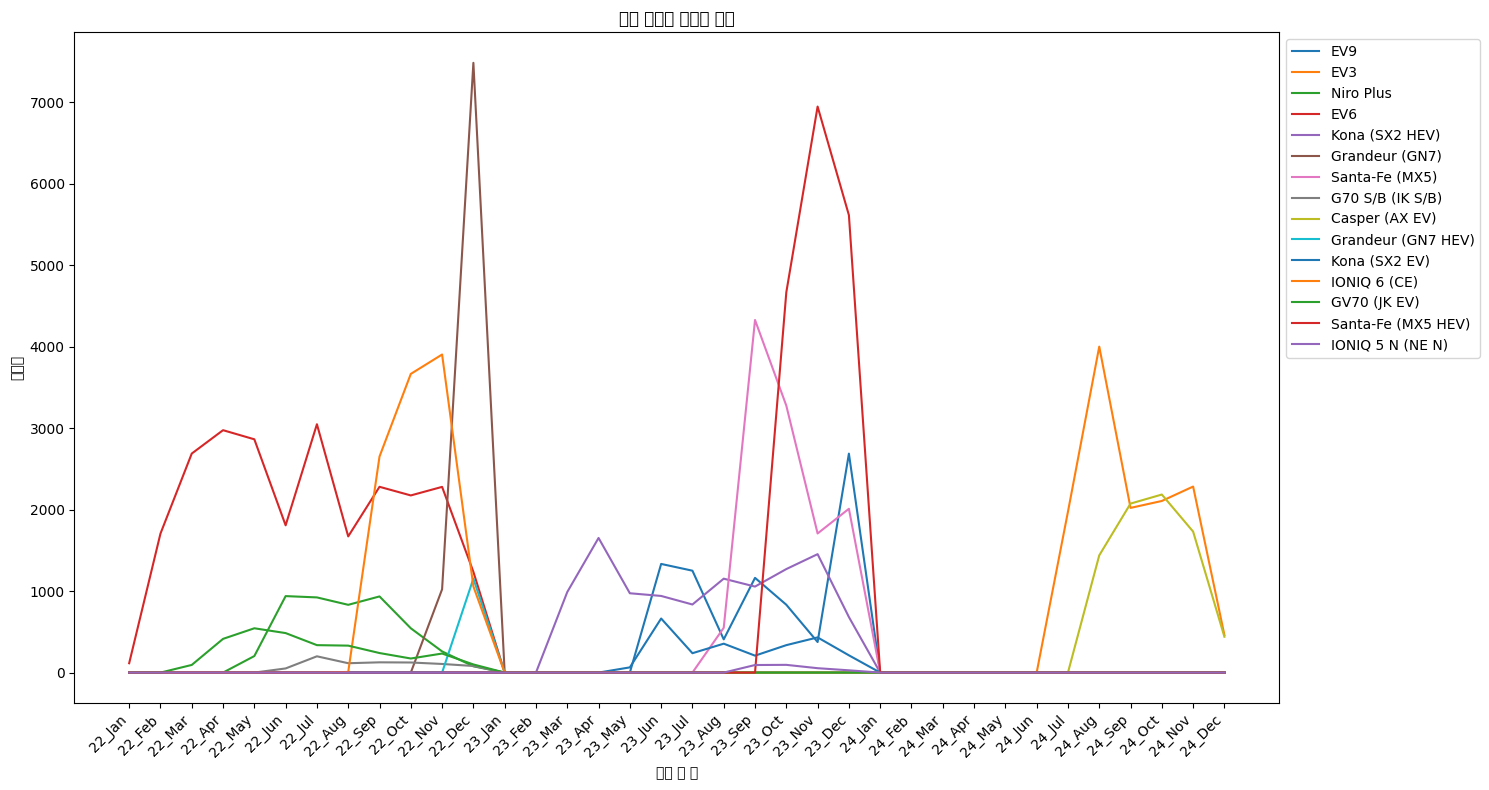

In [413]:
months = [f'{year}_{month}' for year in [22, 23, 24] for month in ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

# 2. 모델별 판매량 그래프 그리기
plt.figure(figsize=(15, 8))  # 그래프 크기 조절 (더 크게)
plt.title('차량 모델별 판매량 추이')  # 그래프 제목
plt.xlabel('연도 및 월')  # x축 레이블
plt.ylabel('판매량')  # y축 레이블

for model in merged_selling['Model'].unique():
    model_data = merged_selling[merged_selling['Model'] == model][months].iloc[0] # 해당 모델의 판매량 데이터 추출
    plt.plot(months, model_data, label=model)

# 3. x축 눈금 및 범례 설정
plt.xticks(rotation=45, ha='right')  # x축 눈금 45도 회전 (읽기 쉽게)
plt.legend(loc='best', bbox_to_anchor=(1, 1)) # 범례 위치 조절 (오른쪽 위)

# 4. 그래프 표시
plt.tight_layout() # 그래프 요소들이 잘리지 않도록
plt.show()